# Assessment 2: Samantha Puljic
## Flight Price Prediction 

## Abstract
This report outlines the analysis of flight booking data, with the goal of creating a model that can accurately predict future flight prices for consumers. To ensure that the optimum predictive model is used, four different prediction models were built and compared. These were a support vector machine, polynomial regression, random forest, and a neural network. All four models performed better than the baseline reference that was set. The Random Forest model predicted the most accurately, most likely due to it being an ensemble method. 

## Introduction
The dataset for this analysis was obtained from Kaggle and contains data from an internet platform called ‘Easymytrip’ that is used for booking flight tickets between India’s top 6 metro cities. The data extracted from the site is 50 days worth of bookings, from February 11th to March 31st 2022.  Variables that are relevant to flight tickets will be used in this analysis, with the variable of ‘price’ being used as the target. After observation of the variables and feature engineering to obtain relevant predictors, 9 variables were selected to be included in this analysis. These variables are outlined below in Table 1.
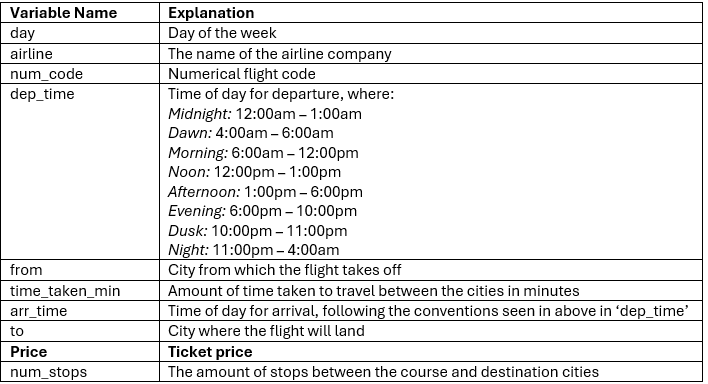
*Table 1. Variables used in the analysis, with the target in bold*

Four prediction models will be used in this analysis to determine the best predictive model for this dataset. These models are listed below:
1. **Support Vector Machine Regression**
   Relationship approximation between input variables and target by maximising the margin between a hyperplane and the closest data points, whilst minimising the error.
2. **Polynomial Regression**
   A regression analysis that fits a polynomial equation on the data to model complex relationships more effectively than linear regression. Suitable in this situation as the relationship between variables is not linear.
3. **Random Forest Regression**
   A combination of multiple decision trees, in which each tree has made an independent decision, and a weighted average of these trees predictions determines the final outcome.
4. **Neural Network**
   A framework of interconnected layers of neurons that maps input features from the independent variables to a target output.

The performance of each of these models will be compared to a naïve baseline, to ensure that the models are performing at a level above this baseline. The model that is found to be performing the best will be saved, with the intention that it can be used to predict flight prices with a high accuracy. 

## Materials and Methods
Various steps will be taken to ensure that the dataset is tidy and appropriate for data modelling. Naming conventions in the variables will be standardised, the type of each variable will be confirmed or changed to be correct, and irrelevant features will be removed. 

Feature engineering will be performed on the DateTime variables to extract meaningful information from them that could be utilised in the model. This includes new categories of ‘day’ and a ‘time of day’ feature for departing time and arrival time. ‘Time taken’ for flights will be changed into a minutes integer. 
 
The two continuous variables were explored and found to be right-skewed. A log transformation will be performed on them to improve them to be more normally distributed. They were also found to have significant outliers present. Because the outliers made up such a small component of the dataset (less than 7%) these were determined to be able to be removed without affecting the integrity of the data.  Possible correlation between the target variable and other features was investigated through correlation matrices and visually through plots. No features were identified as being overly correlated with the target variable, so all were used in the analysis
. 
The dataset being used is very large, with over 200,000 entries. This has caused the training time of the models to be significantly long and unachievable. For this reason, the entries will be reduced to 30,000 using a random sampling approach
.  
A preprocessing pipeline was constructed, to be passed through all the models. It involved the following meth
1. **Standard Scaling**
Standardising the continuous variables, as they are on very different scales. This is to improve the performance of the models.

2. **One Hot Encoding**
Creating a new binary column to convert the categorical variables into numerical. This is necessary to make these variables suitable for machine learning. 

The data was split into a training and testing set to avoid overfitting and to determine how well the models will perform on unseen data. Each of the four models was created through their own pipeline, which consisted of a combination of the previous preprocessing pipeline, and another step that designates the specific model. A Principle Components Analysis was also initiated in each of the pipelines. This was to reduce the dimensionality and complexity of the data. These pipelines were performed on the training data. To find the optimal parameter values for each of the models, the possible values were passed through `GridSearchCV`. The combination of parameters that provided the best estimator were then used to fit the model onto the training data. This model was used to make predictions on the target testing data, to see how the model would perform on unseen data. The table below outlines the combination of parameters that were chosen for each model.

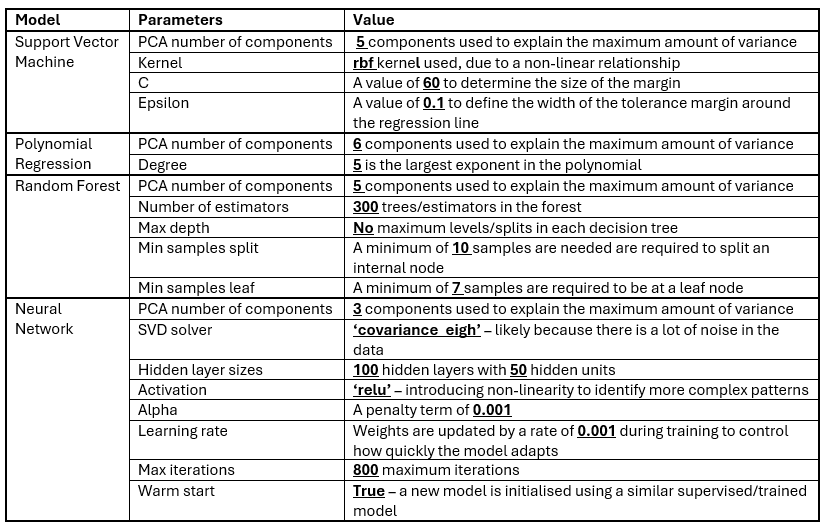
*Table 2. Best Parameters found through tuning for each model*

To determine the accuracy of each of the prediction models, the Root Mean Squared Error was calculated for each. This is a measure of the difference between the actual target values and those predicted by the model. The RMSE of each of the models will be compared to that of a naïve baseline, created from the mean of the target. This naïve baseline sets a minimum performance expectation for the models. 

## Results and Discussion
An RMSE was obtained for each of the models and compared with the naïve baseline RMSE, seen below in Table 3.  

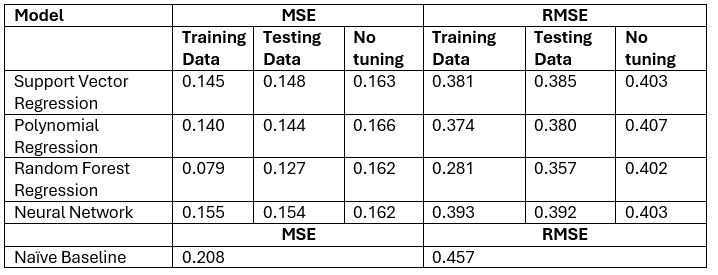
*Table 3. Evaluating the performance of each model*

All models RMSE was lower than the baseline, indicating that all models have predictive power. As can be seen in Table 3, the Random Forest Regression model with an RMSE of 0.357 is performing the best, and has stronger predictive power than the other models. 

The support vector, polynomial regression, and random forest models all performed better on the training data than they did on the testing data. This is expected, as the training data is data that the model has seen before and has been fitted on. Whilst this indicates that there might be some slight overfitting, this difference in performance is not significant. The performance of the model on the testing data is a better indication of how the model will perform on new, unseen data.  The Neural Network model performs slightly better on the testing data than the training. This could be due to the regularisation techniques that are incorporated into neural network models, that prevent overfitting.
 
The Random Forest model performing better than the other models could be due to a number of factors. Its flexibility in handling non-linear relationships would have given it an advantage over the other models, as the relationship between variables in this scenario wasn’t very linear. Its ensemble method of prediction would have ensured it was more robust to outliers and would have helped to limit overfitting
. 
The performance of the models is limited by the restricted speed of the CPU and insufficient RAM. The tuning of more parameters could potentially allow the models to become more accurate. A better indication of how well the models are performing on unseen data through cross-validation is also limited by this. Being able to run more folds would provide a clearer indication of this
## Conclusions
This analysis has determined that a Random Forest Regression model will perform accurately and above a reference baseline to predict flight prices. A Support Vector Regression, Polynomial Regression, and Neural Network also have similar predictive power for this situation, however the ensemble method and robustness to outliers of the Random Forest model makes it a more suitable method for this situation. An improvement to this model would be to include a larger dataset that covers a whole year worth of flight prices, rather than just the 2 months that this dataset covered. This would allow potential relationships between price and time of year to be incorporated into the model. 

### References
Kaggle 2021, Flight Price Prediction Dataset, Shubham Bathwal, accessed January 2025, < https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=economy.csv>. 
ds:


# 1. Loading the Dataset

Importing the data that will be used for the analysis

In [29]:
import pandas as pd
import numpy as np
flights = pd.read_csv("economy.csv")
flights.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
5,11-02-2022,Vistara,UK,945,11:40,Delhi,02h 20m,non-stop,14:00,Mumbai,"5,955"
6,11-02-2022,Vistara,UK,927,09:30,Delhi,02h 05m,non-stop,11:35,Mumbai,"6,060"
7,11-02-2022,Vistara,UK,951,14:20,Delhi,02h 10m,non-stop,16:30,Mumbai,"6,060"
8,11-02-2022,GO FIRST,G8,334,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"5,954"
9,11-02-2022,GO FIRST,G8,336,14:20,Delhi,02h 15m,non-stop,16:35,Mumbai,"5,954"


---

# 2. Pre-Processing

Removing the 'ch_code' column, as it is the same data as 'airline' just in a different format

In [31]:
flights = flights.drop(columns=['ch_code'])

Checking for missing values

In [33]:
flights.isnull().sum()

date          0
airline       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

No values are missing.

Tidying up the categorical variables.

In [35]:
flights['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [37]:
#Changing the format of 'GO FIRST' so it is consistent with the other airlines
flights['airline']=flights['airline'].replace('GO FIRST', 'GoFirst')

Tidying up the 'stop' variable. It has transferred to be messy

In [39]:
flights['stop'].value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      162114
non-stop                                                                         27942
2+-stop                                                                          12205
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1063
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                  588
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                432
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          226
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  193
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JR

In [41]:
#Creating a function to convert the 'stop' variable to one of three options
def extract_stops(stop_str):
    if not stop_str:
        return None
    stop_str = stop_str.strip().lower()
    
    if stop_str in ['non-stop']:
        return 0
    elif '1-stop' in stop_str:
        return 1
    else: return 2

#Creating a new variable with the tidied data
flights['num_stops']= flights['stop'].apply(extract_stops)
flights['num_stops'].value_counts()

#Removing the now redundant 'stop' variable
flights = flights.drop('stop', axis = 1)

Removing the comma from the price column

In [43]:
def price_tidy(price_str):
    if pd.isna(price_str):
        return None
    return price_str.replace(',', '')
flights['price'] = flights['price'].apply(price_tidy)

Checking that the variables are the correct type, and changing if not

In [45]:
print(flights.dtypes)

date          object
airline       object
num_code       int64
dep_time      object
from          object
time_taken    object
arr_time      object
to            object
price         object
num_stops      int64
dtype: object


In [47]:
flights['num_code'] = flights['num_code'].astype('object')
flights['airline'] = flights['airline'].astype('category')
flights['from'] = flights['from'].astype('category')
flights['to'] = flights['to'].astype('category')
flights['price'] = flights['price'].astype('int64')
flights['num_stops'] = flights['num_stops'].astype('category')

Creating a new variable that is a categorical representation of the time of the day. This is done to ensure that there aren't any issues when trying to use a DateTime variable for machine modeling.  

In [49]:
#Creating a function that will sort the time into a corresponding category
def categorise_time(time_str):    
  try:
    hour = int(time_str.split(':')[0])
  except (ValueError, IndexError):
    return None  # Handle invalid time strings

  if 0 <= hour < 1:
    return 'Midnight'
  elif 1 <= hour < 4:
    return 'Night'
  elif 4 <= hour < 6:
    return 'Dawn'
  elif 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 13: 
    return 'Noon'
  elif 13 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 22:
    return 'Evening'
  elif 22 <= hour < 24:
    return 'Dusk'
  else:
    return 'Night'

#Changing the arrival time and departure time variables to this new categorical variable
flights['dep_time'] = flights['dep_time'].apply(categorise_time)
flights['arr_time'] = flights['arr_time'].apply(categorise_time)

Creating a new variable that represents the day of the week

In [51]:
#First converting the 'date' variable to be a datetime object
flights['date'] = pd.to_datetime(flights['date'], format = '%d-%m-%Y')

#Extracting the day of the week from the 'date' variable
flights['day'] = flights['date'].dt.day_name()

#Removing this now redundant 'date' variable
flights = flights.drop(columns = ['date'])

Converting the time taken variable to be just minutes, so it can be expressed as an integer and can be used easier in the machine modeling process. 

In [53]:
#Creating a function that converts the variable first into a datetime format
#Then converts this into just minutes, as an integer
import re
def minute_conversion(time_str):
    if pd.isna(time_str):
        return None
    time_str = time_str.strip() 
    match = re.match(r"(\d+)h\s+(\d+)m", time_str) 
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return (hours * 60) + minutes
    else: 
        return None

flights['time_taken_min'] = flights['time_taken'].apply(minute_conversion)
flights = flights.drop('time_taken', axis = 1)

Checking that all these changes have been applied correctly

In [55]:
flights.head(10)

,airline,num_code,dep_time,from,arr_time,to,price,num_stops,day,time_taken_min
0,SpiceJet,8709,Evening,Delhi,Evening,Mumbai,5953,0,Friday,130.0
1,SpiceJet,8157,Morning,Delhi,Morning,Mumbai,5953,0,Friday,140.0
2,AirAsia,764,Dawn,Delhi,Morning,Mumbai,5956,0,Friday,130.0
3,Vistara,995,Morning,Delhi,Noon,Mumbai,5955,0,Friday,135.0
4,Vistara,963,Morning,Delhi,Morning,Mumbai,5955,0,Friday,140.0
5,Vistara,945,Morning,Delhi,Afternoon,Mumbai,5955,0,Friday,140.0
6,Vistara,927,Morning,Delhi,Morning,Mumbai,6060,0,Friday,125.0
7,Vistara,951,Afternoon,Delhi,Afternoon,Mumbai,6060,0,Friday,130.0
8,GoFirst,334,Morning,Delhi,Morning,Mumbai,5954,0,Friday,130.0
9,GoFirst,336,Afternoon,Delhi,Afternoon,Mumbai,5954,0,Friday,135.0


### Data Exploration

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Continuous Variables
Exploring the continuous variables distribution, summary statistics, and their correlation. This includes the below variables:
- Price (the target variable)
- Time Taken

Removing outliers and transforming the data as deemed necessary.

/tmp/ipykernel_220/702799076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights.price, bins=30)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

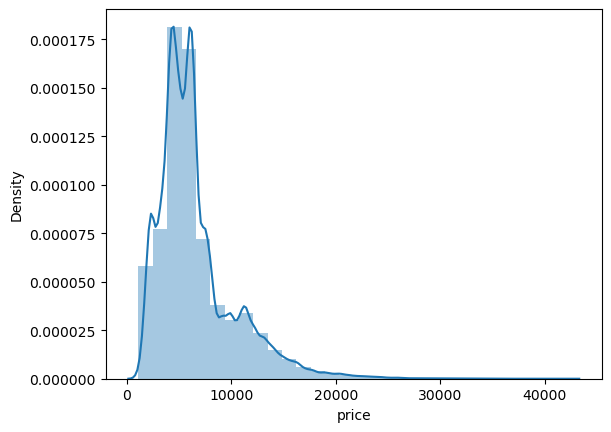

In [65]:
#Price
sns.distplot(flights.price, bins=30)

/tmp/ipykernel_220/2252173096.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights.time_taken_min, bins = 30)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_taken_min', ylabel='Density'>

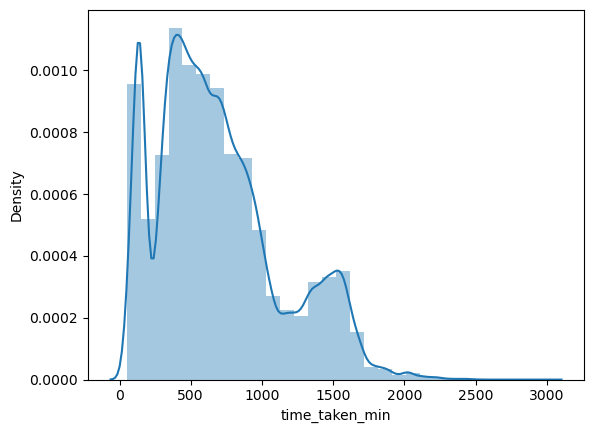

In [67]:
#Time Taken
sns.distplot(flights.time_taken_min, bins = 30)

In [69]:
flights.describe()[['price', 'time_taken_min']]

,price,time_taken_min
count,206774.000000,206770.000000
mean,6571.190701,692.753809
std,3743.442838,434.529088
min,1105.000000,50.000000
25%,4173.000000,375.000000
50%,5772.000000,610.000000
75%,7746.000000,915.000000
max,42349.000000,2990.000000


**Distribution**: As can be seen in the graphs above, neither price nor time taken are normally distributed. They are both right-skewed. To attempt to correct this and make the data more normally distributed and suitable for certain regression analyses, a log transformation will be performed on these variables.

**Outliers**: As seen in the table above, there are outliers present for both variables. The maximum value for both the variables is significantly higher than the mean for each. As the data for each is skewed and doesn't follow a normal distribution, the IQR will be used to determine and remove outliers, instead of a z-score.


#### Removing Outliers

**'Price' variable**

<Axes: ylabel='price'>

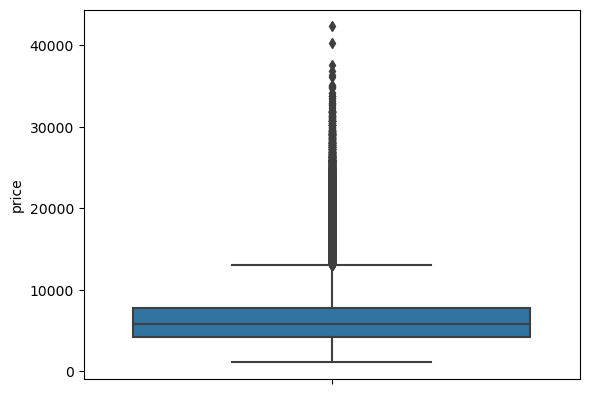

In [71]:
sns.boxplot(y = flights['price'])

A lot of outliers can be seen in the above box plot. Identifying how many there are through the IQR. Any point falling more than 1.5 times the IQR above the third quartile or below the first quartile will be identified as an outlier and removed. 

In [73]:
#Establishing the IQR, to identify outliers
Q1 = flights ['price'].quantile(0.25)
Q3 = flights ['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = flights[(flights['price'] < lower_bound) | (flights['price'] > upper_bound)]
iqr_outliers.head()
print("Number of outliers in price variable :", iqr_outliers.shape[0])

Number of outliers in price variable : 13750


The amount of outliers is small (less than 7%), so these will all be removed

In [75]:
not_outliers = flights[~((flights['price']<lower_bound) | (flights['price']>upper_bound))]
flights = not_outliers.dropna().reset_index()
flights.shape

(193020, 11)

**'time taken' variable**

<Axes: ylabel='time_taken_min'>

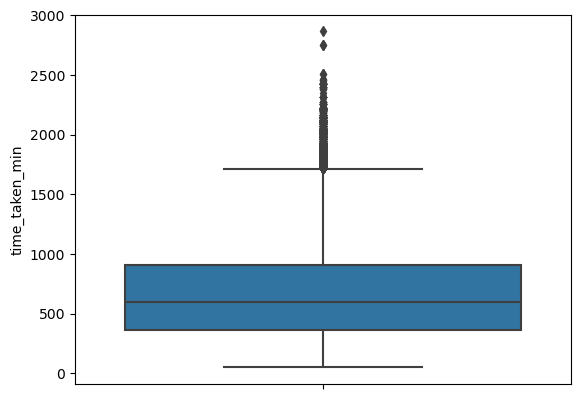

In [77]:
sns.boxplot(y = flights['time_taken_min'])

A lot of outliers can be seen in the above box plot. Identifying how many there are through the IQR. Any point falling more than 1.5 times the IQR above the third quartile or below the first quartile will be identified as an outlier and removed. 

In [79]:
Q1 = flights ['time_taken_min'].quantile(0.25)
Q3 = flights ['time_taken_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = flights[(flights['time_taken_min'] < lower_bound) | (flights['time_taken_min'] > upper_bound)]
iqr_outliers.head()
print("Number of outliers in time taken variable :", iqr_outliers.shape[0])

Number of outliers in time taken variable : 1870


The amount of outliers is small (less than 1%), so they will all be removed. 


In [81]:
not_outliers_time = flights[~((flights['time_taken_min']<lower_bound) | (flights['time_taken_min']>upper_bound))]
flights = not_outliers_time.dropna().reset_index()
flights.shape

(191150, 12)

#### Variable Transformation

As identified above, both the continuous variables are right skewed. Going to perform a log transformation on them to give them a normal distribution. 

/tmp/ipykernel_220/1224798240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights.price_log, bins=30)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_220/1224798240.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axe

<Axes: xlabel='time_log', ylabel='Density'>

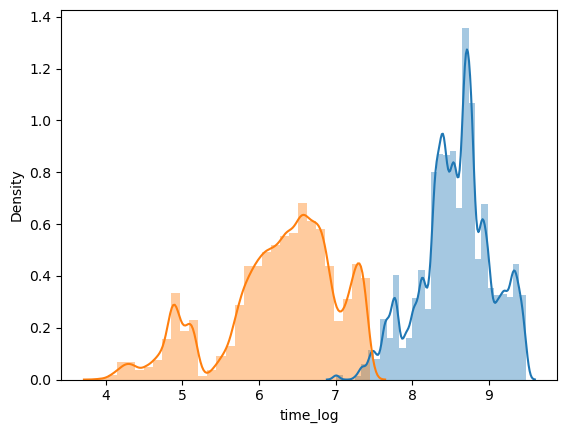

In [83]:
flights['price_log'] = np.log(flights['price'])
#New distribution
sns.distplot(flights.price_log, bins=30)

flights['time_log'] = np.log(flights['time_taken_min'])
#New distribution
sns.distplot(flights.time_log, bins=30)

Both variables are now more normally distributed

### Categorical Variables

Exploring the categorical variables; their distribution and relationship with the target variable. This includes the below variables:
- Airline
- Num_code
- From
- To
- Num_stops
- Day
- Dep_time
- Arr_time

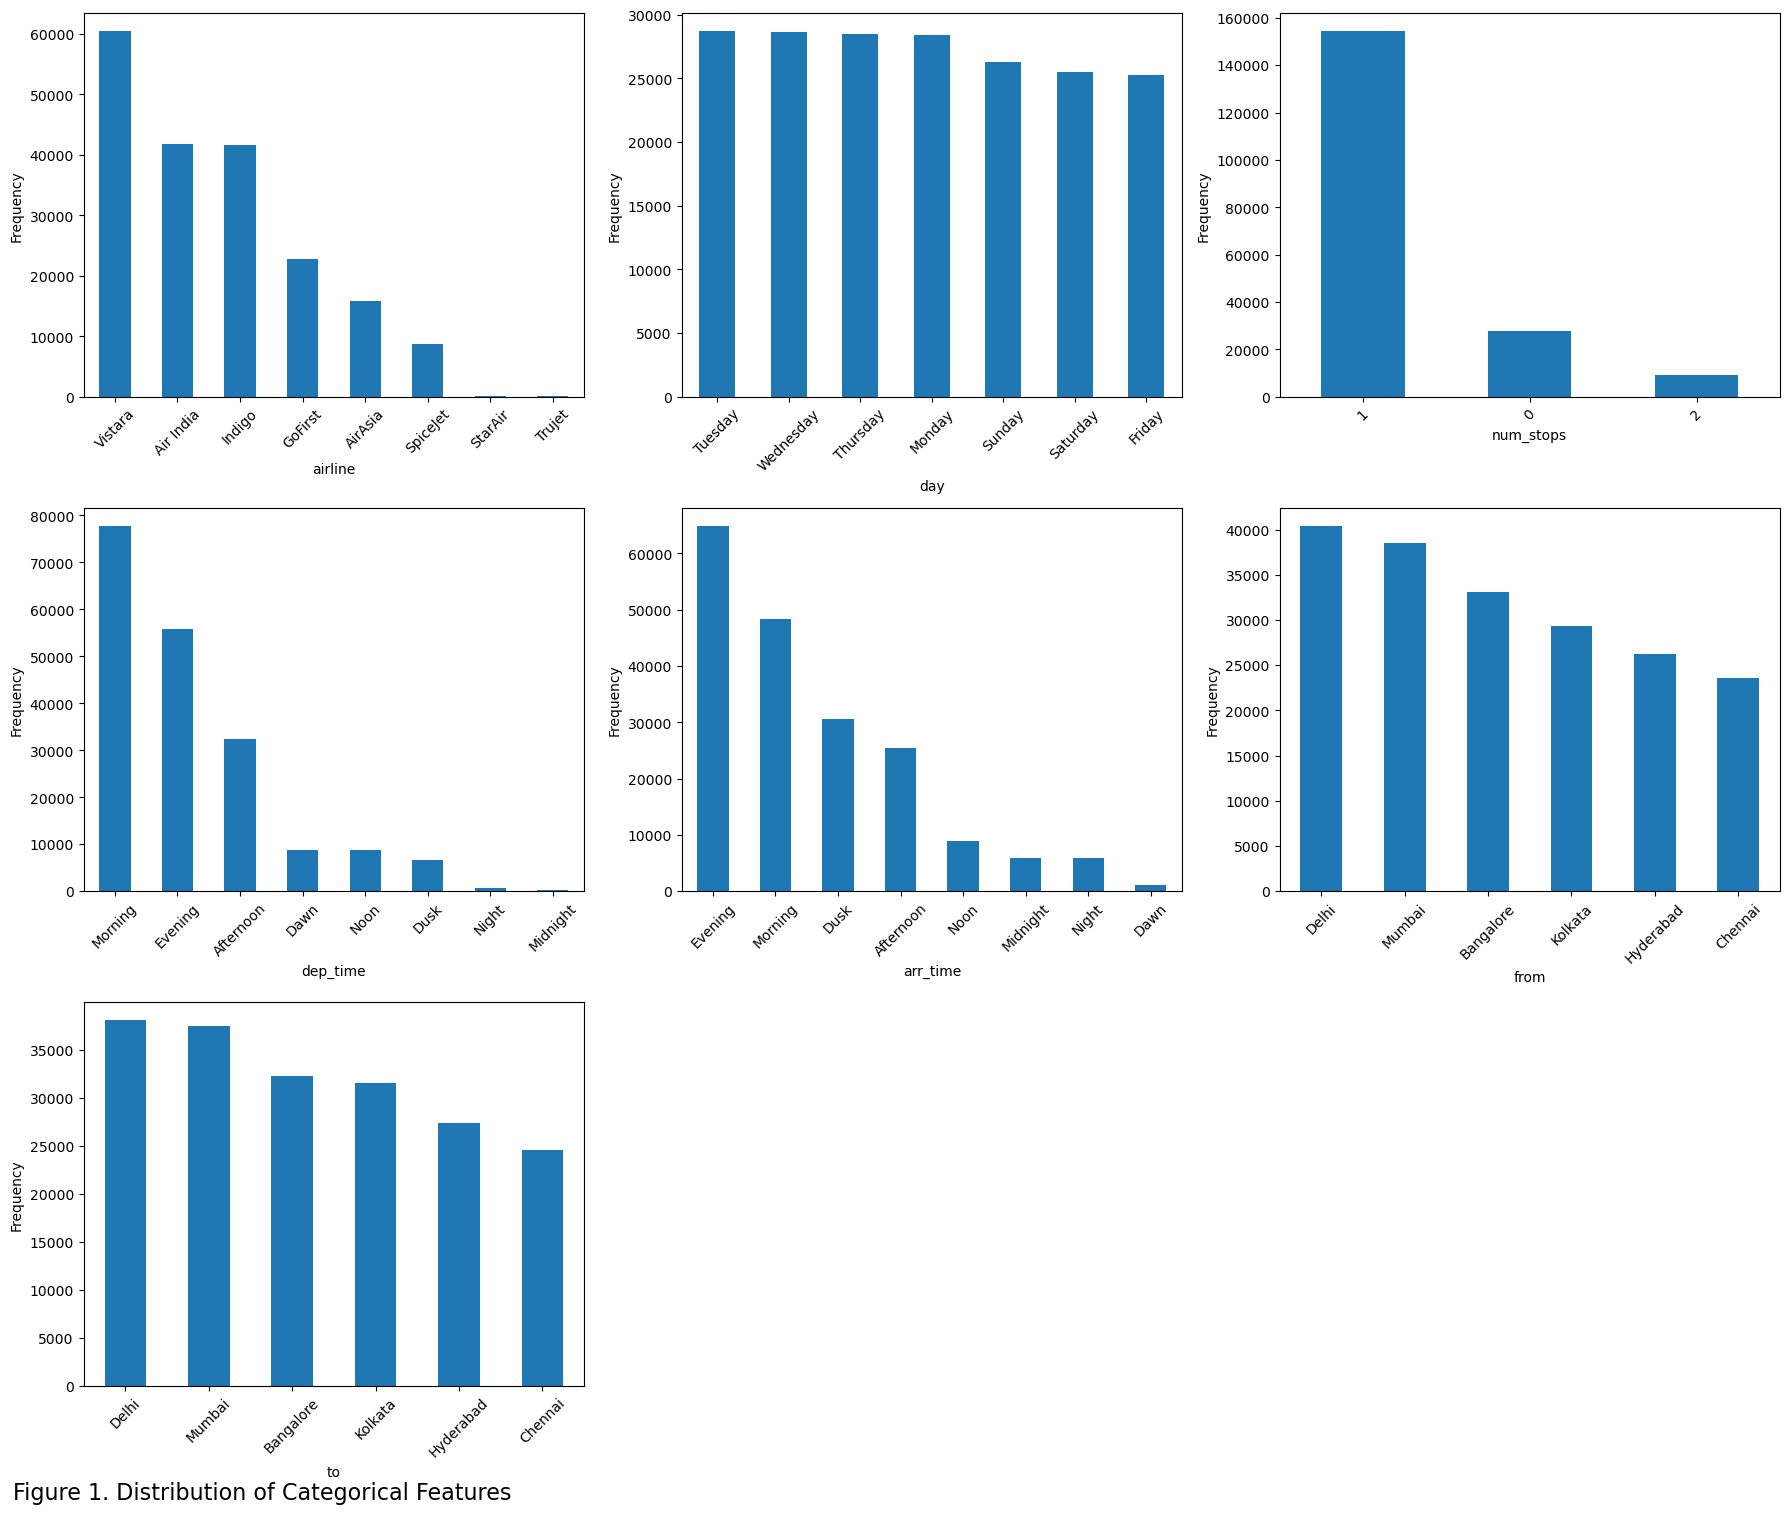

In [92]:
import math

categorical_cols = ['airline', 'day', 'num_stops', 'dep_time', 'arr_time', 'from', 'to'] 
num_cols=3
num_rows = math.ceil(len(categorical_cols)/num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

for i, col in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    flights[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.figtext(0.01, 0.001, 'Figure 1. Distribution of Categorical Features', ha='left', va='center', fontsize=16)
plt.tight_layout()

As can be seen above in Figure 1, Airline, Number of Stops, Department Time and Arrival Time show the greatest variety between their categories. The frequency for the variable 'day' doesn't change much, nor does the departure or arrival locations. 

Comparing the categorical variables to the target variables to observe any potential relationships.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

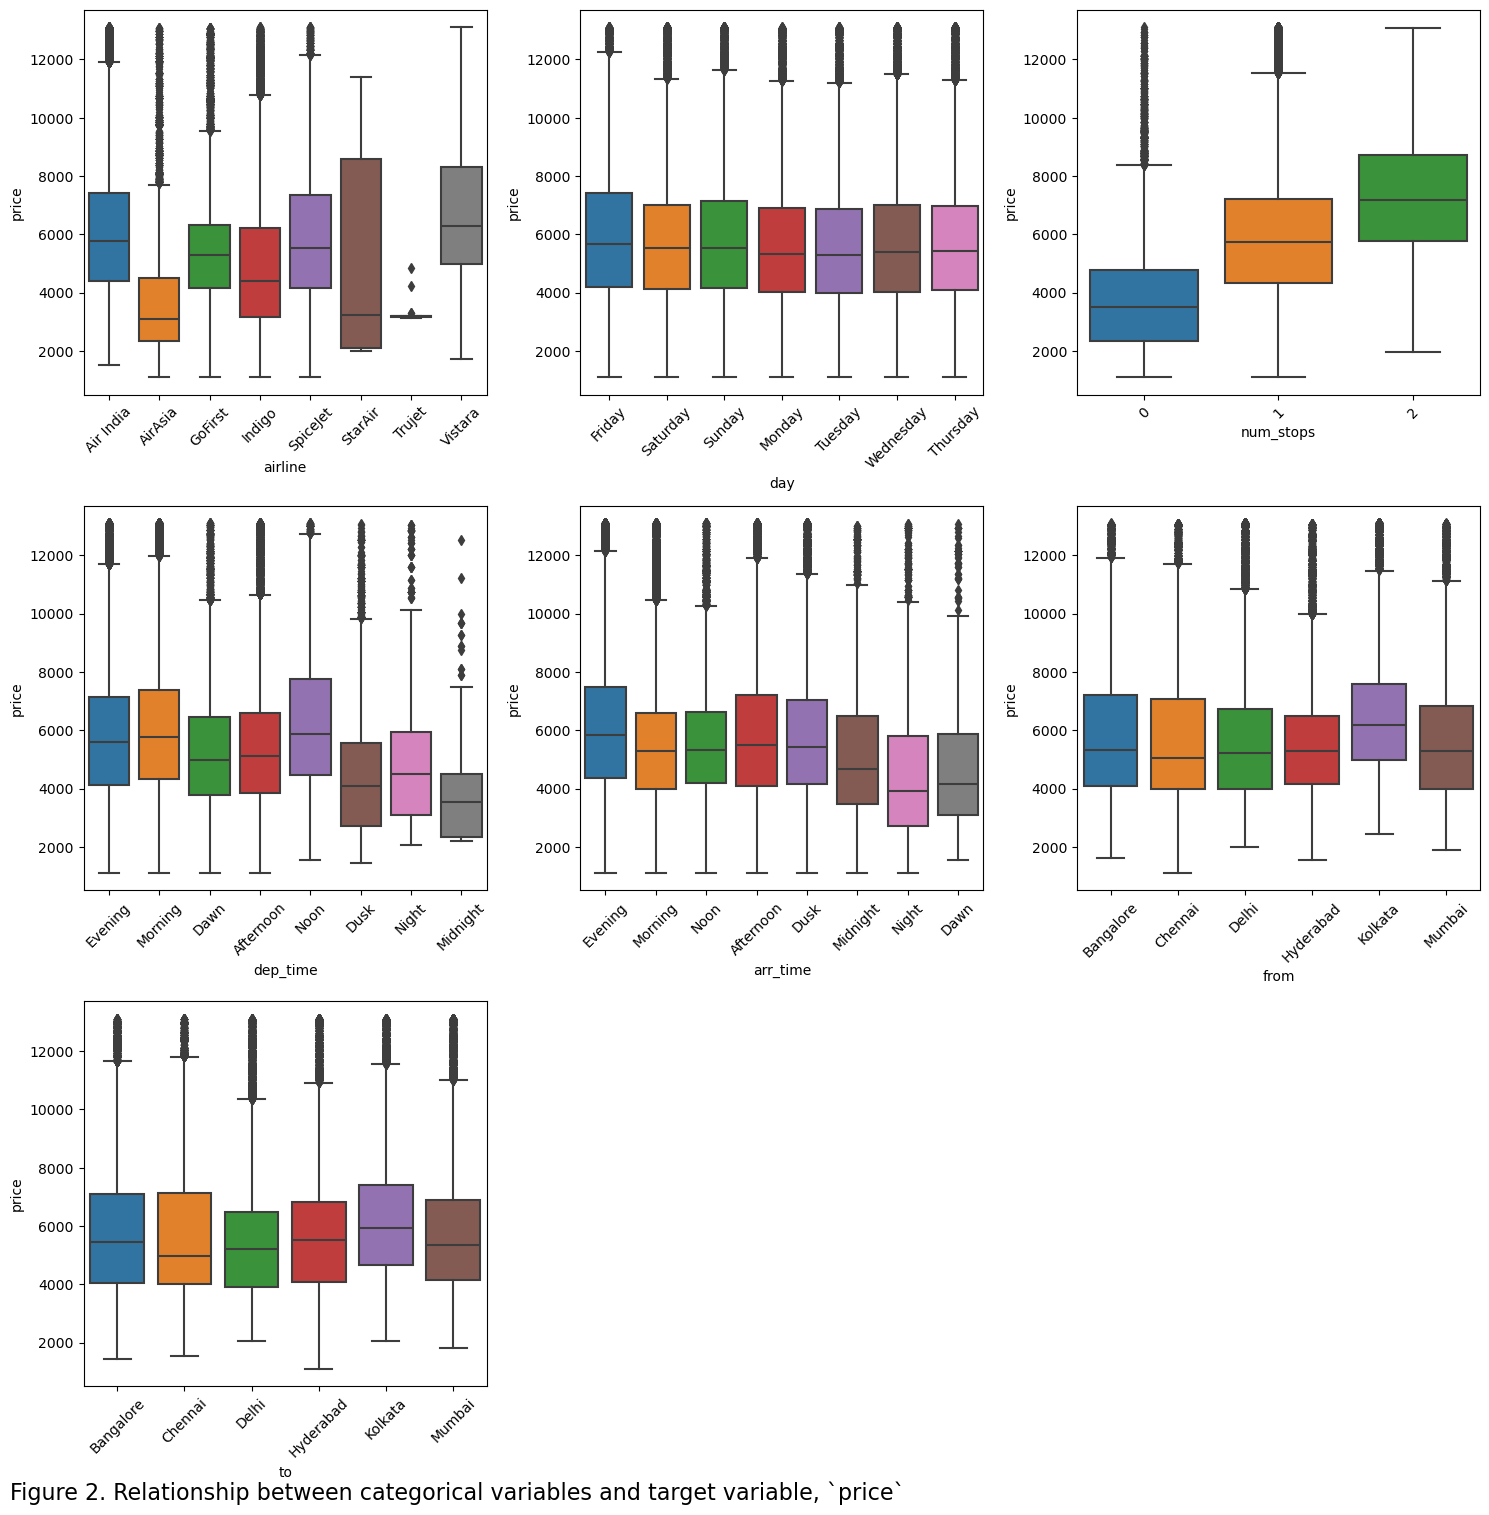

In [94]:
continuous_var = 'price'  # Replace this with your actual continuous variable name

num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    sns.boxplot(x=col, y=continuous_var, data=flights, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel(continuous_var)
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.figtext(0.01, 0.001, 'Figure 2. Relationship between categorical variables and target variable, `price`', ha='left', va='center', fontsize=16)
plt.tight_layout()
plt.show()

Figure 2 shows that the median price for a flight does differ significantly depending on the airline. The price also appears to increase as the number of stops on a flight increases. The median price also can be seen to be affected slightly by the departure or arrival time. The day of the week for a flight doesn't appear to have an impact on the price, and the departure and arrival locations also can't be seen to affect the median price significantly. 

### Normalising and Reducing Dimensionality

#### Random Sampling 

The dataset is quite larger, with over 200,000 samples. This will cause the machine modelling process to proceed at a significantly slow pace. To avoid this and make the process more achievable, the dataset will be reduced to 30,000 entries through random sampling.

In [96]:
flights_sampled = flights.sample(n=30000, random_state=32)

#### Pre-Processing Pipeline
The data needs undergo transformations before it can be used to create a predictive model. For the numerical data, this invovles using StandardScaler to ensure that the data is a standard format in relation to each other. For the categorical data, One Hot Encoding will be used. This will change these variables into numerical features that the machine learning model can understand. 

A pipeline for these processes is created below. However, it won't be applied to the data until after it has been split into a training and testing set. This is to prevent data leakage from the test set into the training set that could be caused by the standardisation of the numerical data. 

In [98]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


num_features = ['time_log']
cat_features = ['airline', 'num_code', 'dep_time', 'from', 'to', 'arr_time', 'num_stops', 'day']

num_pipeline = Pipeline([
    ('scalar', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

#Combining these numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features), 
        ('cat', cat_pipeline, cat_features)
    ])

---

# 3. Data Modelling

Prediction models being used:
1. Polynomial Regression
2. Support Vector Machine for regression
3. Random Forest Regression
4. Neuronal Network Model

Building the four prediction models

### Support Vector Machine Model

In [71]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('pca', PCA()),
    ('svr', SVR())
])

### Polynomial Regression Model

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import RandomizedSearchCV

pr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('pr', PolynomialFeatures()), 
    ('lr', LinearRegression())
])

### Random Forest Regression Model

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('rf', RandomForestRegressor())
])

### Neural Network Model

In [77]:
from sklearn.neural_network import MLPRegressor

nn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('nn', MLPRegressor(solver = 'adam'))
])


---

# 4. Splitting the Data

The data will be split into two datasets; one for training the data and one for testing the predictions.

In [100]:
flights_sampled.head(10)

,level_0,index,airline,num_code,dep_time,from,arr_time,to,price,num_stops,day,time_taken_min,price_log,time_log
155509,156791,167703,Vistara,890,Evening,Hyderabad,Morning,Bangalore,6461,1,Friday,900.0,8.773539,6.802395
16250,16320,17342,AirAsia,791,Dawn,Delhi,Afternoon,Bangalore,3569,1,Saturday,700.0,8.180041,6.551080
36251,36384,38790,AirAsia,792,Noon,Delhi,Dusk,Chennai,7426,1,Sunday,550.0,8.912743,6.309918
152724,153988,164542,GoFirst,517,Evening,Hyderabad,Morning,Mumbai,3423,1,Thursday,635.0,8.138273,6.453625
160030,161363,172557,AirAsia,1543,Afternoon,Hyderabad,Evening,Kolkata,2056,1,Monday,405.0,7.628518,6.003887
94475,94933,100474,GoFirst,805,Morning,Bangalore,Dusk,Mumbai,4807,1,Saturday,915.0,8.477828,6.818924
86638,87082,92244,GoFirst,320,Evening,Bangalore,Night,Delhi,4028,1,Wednesday,360.0,8.301025,5.886104
23251,23340,25123,Vistara,707,Evening,Delhi,Evening,Kolkata,4000,0,Saturday,125.0,8.294050,4.828314
84508,84950,90104,Indigo,276,Afternoon,Bangalore,Dusk,Delhi,4071,1,Sunday,435.0,8.311644,6.075346
165603,167036,178603,Air India,525,Morning,Hyderabad,Dusk,Chennai,6012,1,Wednesday,1030.0,8.701513,6.937314


In [102]:
X = flights_sampled.drop(columns=['price', 'price_log', 'level_0', 'index', 'time_taken_min'])
y = flights_sampled['price_log']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 28)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)


Training dataset: X_train= (21000, 9) , y_train (21000,)
Testing dataset: X_test= (9000, 9) , y_test (9000,)


# 5. Hyperparameter Model Tuning

Each of the models will have the parameters adjusted to improve the performance of the model. 

In [85]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Support Vector Machine Model Tuning

In [125]:
param_grid_svr = {'pca__n_components': [3, 4, 5],
                'svr__kernel': ['rbf', 'linear'],
                 'svr__C': [10, 30, 60],
                 'svr__epsilon': [0.01, 0.1, 1]}

grid_search_svr = GridSearchCV(estimator = svm_pipeline, 
                              param_grid = param_grid_svr, 
                             cv=2,
                             scoring = 'neg_mean_squared_error' )

grid_search_svr.fit(X_train, y_train)

best_params_svr = grid_search_svr.best_params_
print(best_params_svr)

#Making predictions with this best model on the testing dataset
svr_predict = grid_search_svr.best_estimator_.predict(X_test)

#Predictions on the training data
svr_train_predict = grid_search_svr.best_estimator_.predict(X_train)                             

{'pca__n_components': 5, 'svr__C': 60, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [169]:
#Predictions without tuning parameters
svm_pipeline_untuned = Pipeline([
    ('preprocessor', preprocessor), 
    ('pca', PCA(n_components=2)),
    ('svr', SVR())
])

svm_pipeline_untuned.fit(X_train, y_train)
svm_untuned_predict = svm_pipeline_untuned.predict(X_test)

### Polynomial Regression Model Tuning

In [127]:
param_grid_pr = {'pr__degree': [2, 3, 4, 5],
                'pca__n_components':[3,4,5,6]}

grid_search_pr = GridSearchCV(estimator = pr_pipeline, 
                              param_grid = param_grid_pr, 
                               cv=2,
                              scoring = 'neg_mean_squared_error'
                             )

grid_search_pr.fit(X_train, y_train)

best_params_pr = grid_search_pr.best_params_
print(best_params_pr)

#Making predictions with this best model on the testing dataset
pr_predict = grid_search_pr.best_estimator_.predict(X_test)

#Predictions on the training data
pr_train_predict = grid_search_pr.best_estimator_.predict(X_train)

{'pca__n_components': 6, 'pr__degree': 5}


In [159]:
#Predictions without tuning parameters
pr_pipeline_untuned = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components = 2)),
    ('pr', PolynomialFeatures()), 
    ('lr', LinearRegression())
])

pr_pipeline_untuned.fit(X_train, y_train)
pr_untuned_predict = pr_pipeline_untuned.predict(X_test)

### Random Forest Model Tuning

In [131]:
param_grid_rf = {'rf__n_estimators':[200, 300], 
                 'pca__n_components':[4, 5],
                'rf__max_depth': [None, 5], 
                'rf__min_samples_split': [10, 30], 
                'rf__min_samples_leaf': [4, 7]}

grid_search_rf = GridSearchCV(estimator = rf_pipeline, 
                              param_grid = param_grid_rf, 
                              cv=2,
                              scoring = 'neg_mean_squared_error',
                             n_jobs=2)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

#Making predictions with this best model on the testing dataset
rf_predict = grid_search_rf.best_estimator_.predict(X_test)

#Predictions on the training data
rf_train_predict = grid_search_rf.best_estimator_.predict(X_train)

{'pca__n_components': 5, 'rf__max_depth': None, 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}


In [173]:
rf_pipeline_untuned = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components = 2)),
    ('rf', RandomForestRegressor())
])

rf_pipeline_untuned.fit(X_train, y_train)
rf_untuned_predict = rf_pipeline_untuned.predict(X_test)

### Neural Network Model Tuning

In [133]:
param_grid_nn = {'pca__n_components': [1, 2, 3],
                 'pca__svd_solver':['arpack', 'covariance_eigh'],
                    'nn__hidden_layer_sizes':[(64, 32), (32), (100,50)],  
                    'nn__activation': ['relu', 'tanh'],          
                   'nn__alpha': [0.0001, 0.001], 
                   'nn__learning_rate_init': [0.001, 0.01],
                     'nn__max_iter': [500, 800],
                    'nn__warm_start': [True, False]}

grid_search_nn = GridSearchCV(estimator = nn_pipeline, 
                              param_grid = param_grid_nn, 
                              cv=2,
                              scoring = 'neg_mean_squared_error',
                             n_jobs=2)

grid_search_nn.fit(X_train, y_train)

best_params_nn = grid_search_nn.best_params_
print(best_params_nn)

#Making predictions with this best model on the testing dataset
nn_predict = grid_search_nn.best_estimator_.predict(X_test)

#Predictions on the training data
nn_train_predict = grid_search_nn.best_estimator_.predict(X_train)

{'nn__activation': 'relu', 'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (100, 50), 'nn__learning_rate_init': 0.001, 'nn__max_iter': 800, 'nn__warm_start': True, 'pca__n_components': 3, 'pca__svd_solver': 'covariance_eigh'}


In [175]:
nn_pipeline_untuned = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components = 2)),
    ('nn', MLPRegressor(solver = 'adam'))
])

nn_pipeline_untuned.fit(X_train, y_train)
nn_untuned_predict = nn_pipeline_untuned.predict(X_test)

---

# 6. Model Performance - Evaluation
Each model will have its performance evaluated through the calculation of the mean square error and root mean square error. The performance of the model on the testing data will be calculated, as well as the performance on the training data, and the model without the parameters having been tuned. 

A naive baseline will be created, to compare each models RMSE to. This will determine whether each model meets the minimum performance requirements. 

Creating the naive baseline:

In [104]:
baseline = np.mean(y_train)
y_baseline = np.repeat(baseline, len(y_test))
from sklearn.metrics import mean_squared_error
naive_MSE = mean_squared_error(y_test, y_baseline)
naive_RMSE = np.sqrt(naive_MSE)
print('Naive baseline MSE: ', naive_MSE)
print('Naive baseline RMSE: ', naive_RMSE)

Naive baseline MSE:  0.20841368218747056
Naive baseline RMSE:  0.4565234738624845


### Support Vector Machine Model Performance

In [171]:
#Mean Square error 
svr_mse_test = mean_squared_error(y_test, svr_predict) #Testing data
svr_mse_train = mean_squared_error(y_train, svr_train_predict) #Training data
svr_mse_no_tuning = mean_squared_error(y_test, svm_untuned_predict) #Model without tuned parameters

#Root Mean Squared Error 
svr_rmse_test = np.sqrt(svr_mse_test) #Testing data
svr_rmse_train = np.sqrt(svr_mse_train) #Training data
svr_rmse_no_tuning = np.sqrt(svr_mse_no_tuning) #Model without tuned parameters

print("The MSE for the testing data: ", svr_mse_test)
print("The MSE for the training data: ", svr_mse_train)
print("The MSE for the model without tuned parameters: ", svr_mse_no_tuning)

print("The RMSE for the testing data: ", svr_rmse_test)
print("The RMSE for the training data: ", svr_rmse_train)
print("The RMSE for the model without tuned parameters: ", svr_rmse_no_tuning)

The MSE for the testing data:  0.14794781138325516
The MSE for the training data:  0.14507854888389887
The MSE for the model without tuned parameters:  0.1625681451023061
The RMSE for the testing data:  0.384639846328036
The RMSE for the training data:  0.38089178106635335
The RMSE for the model without tuned parameters:  0.40319740215222877


### Polynomial Regression Model Performance

In [165]:
#Mean Square error 
pr_mse_test = mean_squared_error(y_test, pr_predict) #Testing data
pr_mse_train = mean_squared_error(y_train, pr_train_predict) #Training data
pr_mse_no_tuning = mean_squared_error(y_test, pr_untuned_predict) #Model without tuned parameters

#Root Mean Squared Error 
pr_rmse_test = np.sqrt(pr_mse_test) #Testing data
pr_rmse_train = np.sqrt(pr_mse_train) #Training data
pr_rmse_no_tuning = np.sqrt(pr_mse_no_tuning) #Model without tuned parameters

print("The MSE for the testing data: ", pr_mse_test)
print("The MSE for the training data: ", pr_mse_train)
print("The MSE for the model without tuned parameters: ", pr_mse_no_tuning)

print("The RMSE for the testing data: ", pr_rmse_test)
print("The RMSE for the training data: ", pr_rmse_train)
print("The RMSE for the model without tuned parameters: ", pr_rmse_no_tuning)

The MSE for the testing data:  0.1442678788604723
The MSE for the training data:  0.13989497110617746
The MSE for the model without tuned parameters:  0.1660473108889845
The RMSE for the testing data:  0.37982611661189425
The RMSE for the training data:  0.37402536158150756
The RMSE for the model without tuned parameters:  0.40748903161801114


### Random Forest Model Performance

In [177]:
#Mean Square error 
rf_mse_test = mean_squared_error(y_test, rf_predict) #Testing data
rf_mse_train = mean_squared_error(y_train, rf_train_predict) #Training data
rf_mse_no_tuning = mean_squared_error(y_test, rf_untuned_predict) #Model without tuned parameters

#Root Mean Squared Error 
rf_rmse_test = np.sqrt(rf_mse_test) #Testing data
rf_rmse_train = np.sqrt(rf_mse_train) #Training data
rf_rmse_no_tuning = np.sqrt(rf_mse_no_tuning) #Model without tuned parameters

print("The MSE for the testing data: ", rf_mse_test)
print("The MSE for the training data: ", rf_mse_train)
print("The MSE for the model without tuned parameters: ", rf_mse_no_tuning)

print("The RMSE for the testing data: ", rf_rmse_test)
print("The RMSE for the training data: ", rf_rmse_train)
print("The RMSE for the model without tuned parameters: ", rf_rmse_no_tuning)

The MSE for the testing data:  0.1274506223022298
The MSE for the training data:  0.07886144224513285
The MSE for the model without tuned parameters:  0.161934206734221
The RMSE for the testing data:  0.35700227212474406
The RMSE for the training data:  0.2808227950952929
The RMSE for the model without tuned parameters:  0.4024104953082374


### Neural Network Model Performance

In [179]:
#Mean Square error 
nn_mse_test = mean_squared_error(y_test, nn_predict) #Testing data
nn_mse_train = mean_squared_error(y_train, nn_train_predict) #Training data
nn_mse_no_tuning = mean_squared_error(y_test, nn_untuned_predict) #Model without tuned parameters

#Root Mean Squared Error 
nn_rmse_test = np.sqrt(nn_mse_test) #Testing data
nn_rmse_train = np.sqrt(nn_mse_train) #Training data
nn_rmse_no_tuning = np.sqrt(nn_mse_no_tuning) #Model without tuned parameters

print("The MSE for the testing data: ", nn_mse_test)
print("The MSE for the training data: ", nn_mse_train)
print("The MSE for the model without tuned parameters: ", nn_mse_no_tuning)

print("The RMSE for the testing data: ", nn_rmse_test)
print("The RMSE for the training data: ", nn_rmse_train)
print("The RMSE for the model without tuned parameters: ", nn_rmse_no_tuning)

The MSE for the testing data:  0.1536655560695738
The MSE for the training data:  0.15476483737031346
The MSE for the model without tuned parameters:  0.1625406909459148
The RMSE for the testing data:  0.39200198477759496
The RMSE for the training data:  0.3934016234973026
The RMSE for the model without tuned parameters:  0.40316335516253804


---